In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime as dt

import factor as ft

In [2]:
percentiles = {
    'value' : 2,
    'momentum' : 3,
    'vol' : 4
}

In [3]:
db = ft.Stocks(percentiles, 60, 12, False)

In [5]:
db.value = 2

In [6]:
db.value

{'low': [([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  ([], nan),
  (['WYNN', 'DIS', 'BMY', 'MCK', 'CVX'], -0.019953453691760426),
  (['WYNN', 'HPQ', 'DIS', 'MCK', 'BMY', 'HSY'], -0.016325621052390955)

In [3]:
db.hist.head()

,SPY,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1972-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.231512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.232281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.218856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.217298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.234043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
securities_list = [list(set(db.value['low'][i][0] + db.momentum['high'][i][0])) for i in range(db.hist.shape[0])]

In [36]:
securities_list = [x[0] for x in db.vol['high']]

In [37]:
port = (pd.Series([db.perf.loc[:, securities_list[i]].iloc[i+1].mean() for i in range(len(a)-1)],
                 index = db.perf.index[:-1])
        .dropna())

In [38]:
cols = [x for x in db.perf if x != 'SPY']
market = db.perf.loc[:, cols].mean(axis = 1)
market = market.loc[port.index]

In [39]:
port.mean(), market.mean()

(0.011904478447328105, 0.010490960028918162)

In [40]:
(port - market).mean() / (port - market).std()

0.018964512889755997

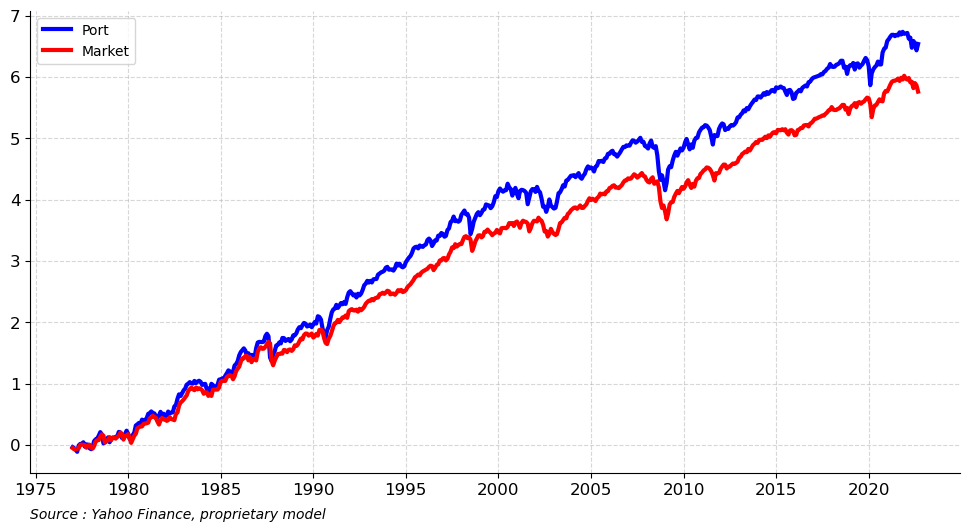

In [41]:
f, ax = plt.subplots(figsize=(12, 6))
ax.plot(port.index, port.cumsum(), lw=3, color='blue', label='Port')
ax.plot(port.index, market.cumsum(), lw=3, color='red', label='Market')
ax.legend()
ax.grid(alpha=0.5, ls='--')
ax.spines[['top', 'right']].set_visible(False)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1,
               'Source : Yahoo Finance, proprietary model',
               fontstyle='italic',
               transform=ax.transAxes)

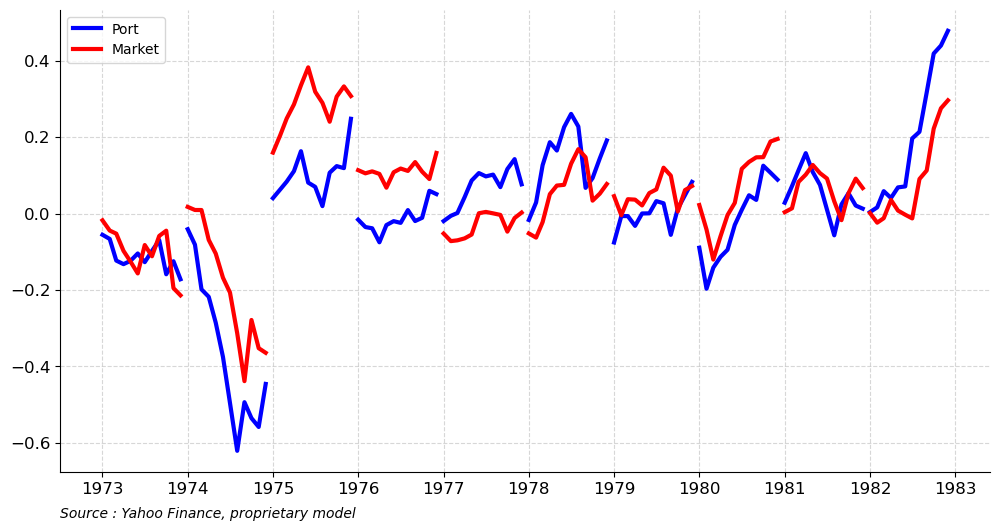

In [35]:
f, ax = plt.subplots(figsize=(12, 6))

for y in range(1973, 1983) :
    index = [x for x in port.index if x.year == y]
    port_values = pd.Series([x for i, x in enumerate(port) if port.index[i].year == y]).cumsum()
    market_values = pd.Series([x for i, x in enumerate(market) if market.index[i].year == y]).cumsum()
    if y == 1973 :
        label_p = 'Port'
        label_m = 'Market'
    else :
        label_p = None
        label_m = None
    ax.plot(index, port_values, lw=3, color='blue', label=label_p)
    ax.plot(index, market_values, lw=3,  color='red', label=label_m)

ax.legend()
ax.grid(alpha=0.5, ls='--')
ax.spines[['top', 'right']].set_visible(False)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1,
               'Source : Yahoo Finance, proprietary model',
               fontstyle='italic',
               transform=ax.transAxes)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


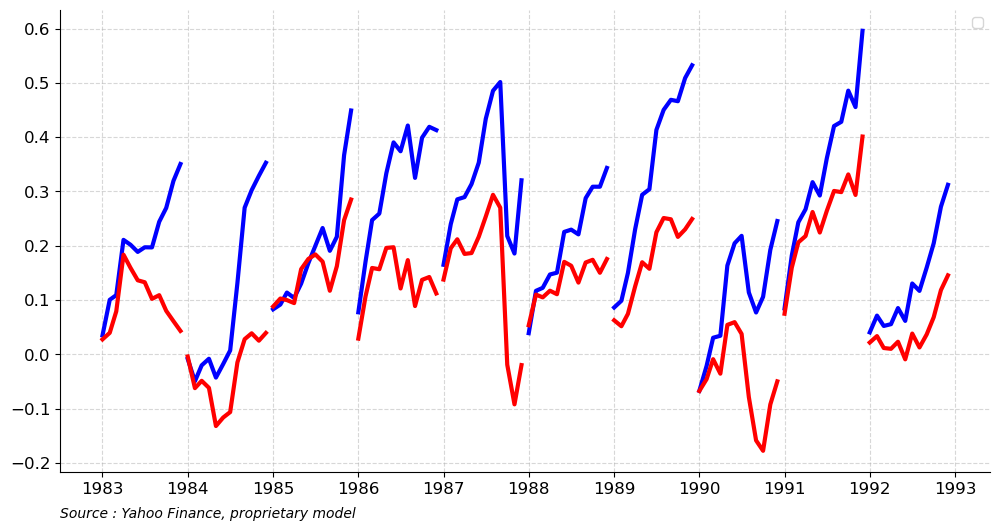

In [85]:
f, ax = plt.subplots(figsize=(12, 6))

for y in range(1983, 1993) :
    index = [x for x in port.index if x.year == y]
    port_values = pd.Series([x for i, x in enumerate(port) if port.index[i].year == y]).cumsum()
    market_values = pd.Series([x for i, x in enumerate(market) if market.index[i].year == y]).cumsum()
    if y == 1983 :
        label_p = 'Port'
        label_m = 'Market'
    else :
        label_p = None
        label_m = None
    ax.plot(index, port_values, lw=3, color='blue', label=label_p)
    ax.plot(index, market_values, lw=3,  color='red', label=label_m)

ax.legend()
ax.grid(alpha=0.5, ls='--')
ax.spines[['top', 'right']].set_visible(False)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1,
               'Source : Yahoo Finance, proprietary model',
               fontstyle='italic',
               transform=ax.transAxes)

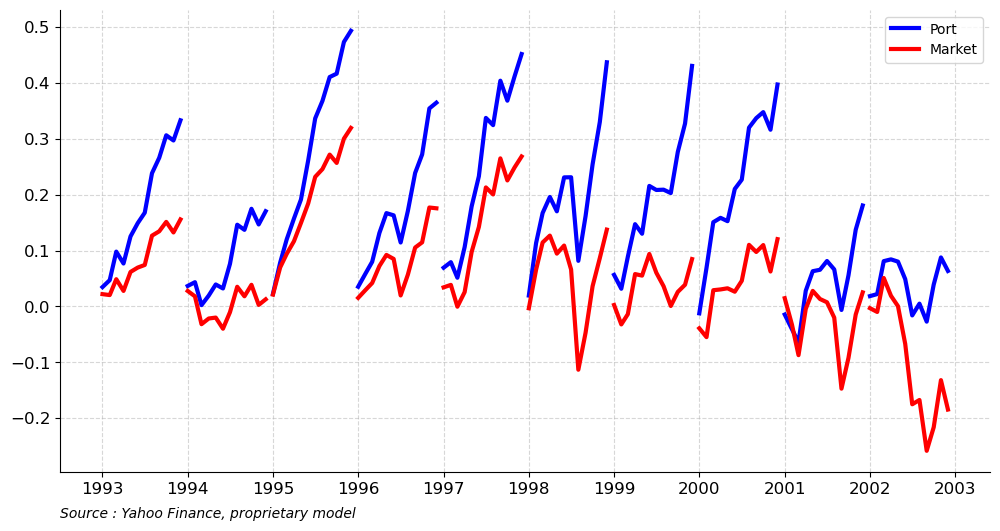

In [86]:
f, ax = plt.subplots(figsize=(12, 6))

for y in range(1993, 2003) :
    index = [x for x in port.index if x.year == y]
    port_values = pd.Series([x for i, x in enumerate(port) if port.index[i].year == y]).cumsum()
    market_values = pd.Series([x for i, x in enumerate(market) if market.index[i].year == y]).cumsum()
    if y == 1993 :
        label_p = 'Port'
        label_m = 'Market'
    else :
        label_p = None
        label_m = None
    ax.plot(index, port_values, lw=3, color='blue', label=label_p)
    ax.plot(index, market_values, lw=3,  color='red', label=label_m)

ax.legend()
ax.grid(alpha=0.5, ls='--')
ax.spines[['top', 'right']].set_visible(False)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1,
               'Source : Yahoo Finance, proprietary model',
               fontstyle='italic',
               transform=ax.transAxes)

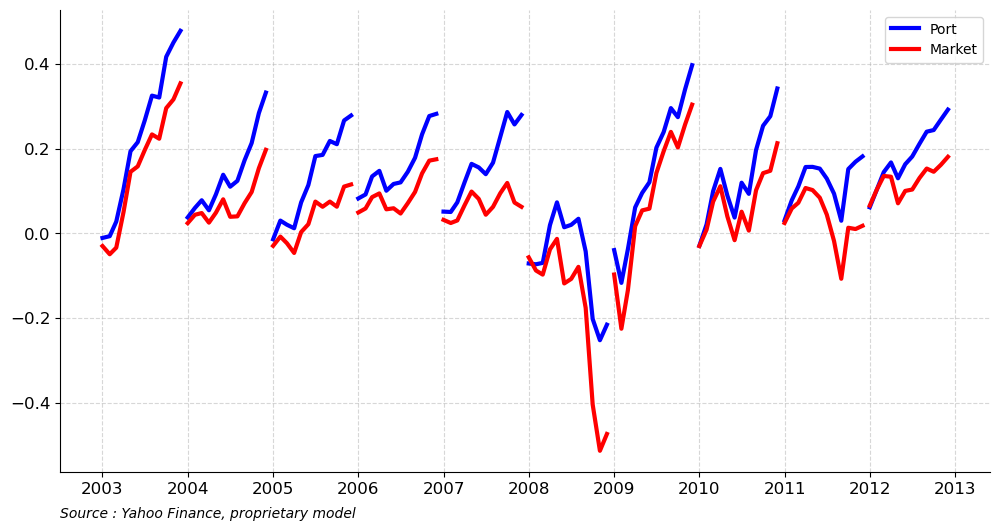

In [87]:
f, ax = plt.subplots(figsize=(12, 6))

for y in range(2003, 2013) :
    index = [x for x in port.index if x.year == y]
    port_values = pd.Series([x for i, x in enumerate(port) if port.index[i].year == y]).cumsum()
    market_values = pd.Series([x for i, x in enumerate(market) if market.index[i].year == y]).cumsum()
    if y == 2003 :
        label_p = 'Port'
        label_m = 'Market'
    else :
        label_p = None
        label_m = None
    ax.plot(index, port_values, lw=3, color='blue', label=label_p)
    ax.plot(index, market_values, lw=3,  color='red', label=label_m)

ax.legend()
ax.grid(alpha=0.5, ls='--')
ax.spines[['top', 'right']].set_visible(False)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1,
               'Source : Yahoo Finance, proprietary model',
               fontstyle='italic',
               transform=ax.transAxes)

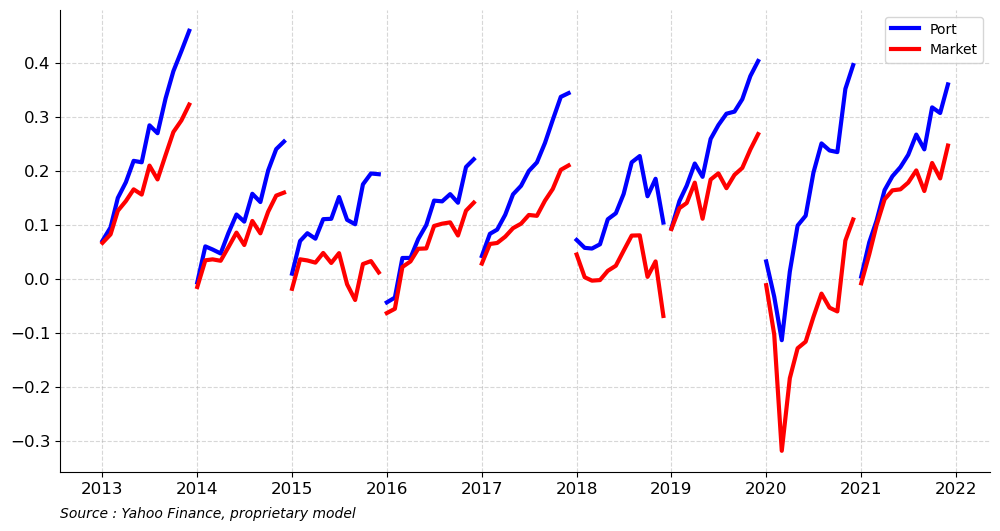

In [88]:
f, ax = plt.subplots(figsize=(12, 6))

for y in range(2013, 2022) :
    index = [x for x in port.index if x.year == y]
    port_values = pd.Series([x for i, x in enumerate(port) if port.index[i].year == y]).cumsum()
    market_values = pd.Series([x for i, x in enumerate(market) if market.index[i].year == y]).cumsum()
    if y == 2013 :
        label_p = 'Port'
        label_m = 'Market'
    else :
        label_p = None
        label_m = None
    ax.plot(index, port_values, lw=3, color='blue', label=label_p)
    ax.plot(index, market_values, lw=3,  color='red', label=label_m)

ax.legend()
ax.grid(alpha=0.5, ls='--')
ax.spines[['top', 'right']].set_visible(False)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1,
               'Source : Yahoo Finance, proprietary model',
               fontstyle='italic',
               transform=ax.transAxes)

In [14]:
pd.Series([db.vol['low'][i][1] for i in range(db.hist.shape[0])]).mean()

0.009359396210925576

In [6]:
pd.Series([db.vol['mid'][i][1] for i in range(db.hist.shape[0])]).mean()

0.011701874909992981

In [7]:
pd.Series([db.vol['high'][i][1] for i in range(db.hist.shape[0])]).mean()

0.008774564911335967

In [8]:
r = (pd.Series([db.vol['low'][i][1] for i in range(db.hist.shape[0])])
- pd.Series([db.vol['high'][i][1] for i in range(db.hist.shape[0])])).mean()

In [9]:
s = (pd.Series([db.vol['low'][i][1] for i in range(db.hist.shape[0])])
- pd.Series([db.vol['high'][i][1] for i in range(db.hist.shape[0])])).std()

In [10]:
r/s

0.01039221885964785

In [20]:
pd.Series([db.value['low'][i][1] for i in range(db.hist.shape[0])]).mean()

0.018304112614842622

In [21]:
pd.Series([db.value['high'][i][1] for i in range(db.hist.shape[0])]).mean()

0.0020534745282525845

In [22]:
pd.Series([db.value['mid'][i][1] for i in range(db.hist.shape[0])]).mean()

0.007982900297749323

In [26]:
r = (pd.Series([db.value['low'][i][1] for i in range(db.hist.shape[0])])
- pd.Series([db.value['high'][i][1] for i in range(db.hist.shape[0])])).mean()


In [27]:
s = (pd.Series([db.value['low'][i][1] for i in range(db.hist.shape[0])])
- pd.Series([db.value['high'][i][1] for i in range(db.hist.shape[0])])).std()


In [28]:
r / s

0.34733244214644554

In [4]:
pd.Series([db.momentum['low'][i][1] for i in range(db.hist.shape[0])]).mean()

-0.012088331580706844

In [5]:
pd.Series([db.momentum['mid'][i][1] for i in range(db.hist.shape[0])]).mean()

0.009761718268191706

In [6]:
pd.Series([db.momentum['high'][i][1] for i in range(db.hist.shape[0])]).mean()

0.031187661218004682

In [18]:
r = (pd.Series([db.momentum['high'][i][1] for i in range(db.hist.shape[0])])
- pd.Series([db.momentum['low'][i][1] for i in range(db.hist.shape[0])])).mean()

In [19]:
s = (pd.Series([db.momentum['high'][i][1] for i in range(db.hist.shape[0])])
- pd.Series([db.momentum['low'][i][1] for i in range(db.hist.shape[0])])).std()

In [20]:
r / s

0.7591646725344757

In [12]:
_y = []
_y_hat = []
_index = []
# max = data.shape[0] - reg_period - vol_period
max = 100

In [ ]:
class FactorModel:

  def __init__(self, vol_period: int, mom_period: int, reg_period: int):
    '''
      vol_period : Volatility Period
      mom_period : Momentum Period
      reg_period : Regression window
    '''
    db = db(vol_period, mom_period)
    self.vol_period = vol_period
    self.reg_period = reg_period

  

  def gen_trades(cash: float, portfolio: pd.DataFrame, new_stocks, pricing_dt):
    ''' 
      cash : remainder cash position
      portfolio : 
        index : Ticker
        quantity : outstanding position
      new_stocks : list of new positions
      pricing_dt : date of the trade
    '''
    portfolio['c1_price'] = portfolio.index.map(db.hist.loc[pricing_dt,
                                                            portfolio.index])
    try:
      nav = (portfolio['quantity'] * portfolio['c1_price']).sum() + cash
    except:
      nav = cash

    final = pd.DataFrame(db.hist.loc[pricing_dt, new_stocks])
    final.columns = ['c2_price']
    final['quantity_f'] = [nav / len(new_stocks)] * final.shape[0]
    final['quantity_f'] /= final['c2_price']
    final['quantity_f'] = final['quantity_f'].map(lambda x: int(x))

    blotter = portfolio.join(final, how='outer').fillna(0)
    try:
      blotter['quantity'] = (blotter['quantity_f'] - blotter['quantity'])
    except:
      blotter['quantity'] = blotter['quantity_f']

    blotter['cost_price'] = blotter[['c1_price', 'c2_price']].max(axis=1)
    blotter = blotter[['quantity', 'cost_price']]
    blotter['date'] = [pricing_dt] * blotter.shape[0]
    blotter = blotter[blotter['quantity'] != 0]
    blotter.index.name = 'tickers'

    new_cash = cash - (blotter['quantity'] * blotter['cost_price']).sum()
    return (new_cash, blotter)